In [1]:
import pandas as pd
import numpy as np

In [2]:
def calculate_ac_value(dm, sp):
    #score = dm / (sp + 1)
    score = dm - sp
    
    return score


In [3]:
def find_ac_category(sort_label, num_A):
    
    df_data = pd.read_csv('./pred_result_s.csv', usecols= ['lng','lat','time', 'dm_pred','dm', 'sp'])
    df_data['pred_score'] = df_data['dm_pred'] - df_data['sp']
    df_data['real_score'] = df_data['dm'] - df_data['sp']
    
    # params
    min_dm = 3
    min_sp = 3
    
    df_data[(df_data['dm'] >= min_dm ) &  (df_data['sp'] >= min_sp)]
        
    df_score = df_data.groupby(['lng', 'lat'])['pred_score','real_score'].sum().reset_index()
    df_score.sort_values([sort_label], ascending=False, inplace=True)
    
    df_score[['lat','lng']][:num_A].to_csv((sort_label+'_cd_ABlocks.csv'), index=False)

In [5]:
find_ac_category('pred_score', 500)

In [142]:
import matplotlib.pyplot as plt

In [143]:
s = df_score['pred_score'].values

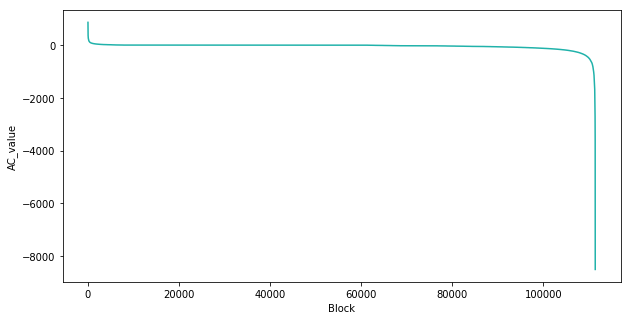

In [144]:
plt.figure(figsize=(10,5))
plt.plot(s, color = 'lightseagreen')
plt.xlabel('Block')
plt.ylabel('AC_value')
plt.show()
plt.close()